In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import KFold

# caminhos para os csvs
ocorrencia_path = './dados/ocorrencia.csv'    
aeronave_path = './dados/aeronave.csv'    
ocorrencia_tipo_path = './dados/ocorrencia_tipo.csv'    
fator_contribuinte_path = './dados/fator_contribuinte.csv'    
recomendacao_path = './dados/recomendacao.csv'    

# datesets completos
ocorrencia = pd.read_csv(ocorrencia_path, encoding="latin1", sep=";")
aeronave = pd.read_csv(aeronave_path, encoding="latin1", sep=";")
ocorrencia_tipo = pd.read_csv(ocorrencia_tipo_path, encoding="latin1", sep=";")
fator_contribuinte = pd.read_csv(fator_contribuinte_path, encoding="latin1", sep=";")
recomendacao = pd.read_csv(recomendacao_path, encoding="latin1", sep=";")

# add coluna de class = 0 (teve fatalidade) ou class = 1 (teve fatalidade)
ocorr_fatais = aeronave['aeronave_fatalidades_total'] > 0
classes = []
for ocorr in ocorr_fatais:
    if ocorr:
        classes.append(1)
    else:
        classes.append(0)

print(np.count_nonzero(classes))
print(len(classes) - np.count_nonzero(classes))

aeronave['classes'] = classes

ocorrencia.head(5)

673
12628


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,11/05/2025,04:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,09/05/2025,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,04/05/2025,14:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,...,10/05/2025,10:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [14]:
ocorrencia_aeronave = ocorrencia.merge(
    aeronave, 
    left_on="codigo_ocorrencia2", 
    right_on="codigo_ocorrencia2", 
    how="inner"
)[['aeronave_registro_categoria', 'aeronave_fase_operacao', 'aeronave_tipo_operacao', 'classes']]

ocorrencia_aeronave.tail(20)

,aeronave_registro_categoria,aeronave_fase_operacao,aeronave_tipo_operacao,classes
13281,AVIÃO,CRUZEIRO,PRIVADA,1
13282,AVIÃO,DECOLAGEM,PRIVADA,0
13283,AVIÃO,INDETERMINADA,TÁXI AÉREO,1
13284,HELICÓPTERO,ARREMETIDA NO AR,PRIVADA,0
13285,AVIÃO,INDETERMINADA,TÁXI AÉREO,0
13286,AVIÃO,CORRIDA APÓS POUSO,PRIVADA,1
13287,AVIÃO,DESCIDA,TÁXI AÉREO,1
13288,HELICÓPTERO,APROXIMAÇÃO FINAL,NÃO REGULAR,0
13289,AVIÃO,DECOLAGEM,TÁXI AÉREO,0
13290,AVIÃO,POUSO,TÁXI AÉREO,0


In [18]:
# faz one-hot encoding em cada coluna
ocorrencia_aeronave_encoded = pd.get_dummies(
    ocorrencia_aeronave, columns=['aeronave_registro_categoria', 'aeronave_fase_operacao', 'aeronave_tipo_operacao']
)
ocorrencia_aeronave_encoded.columns
ocorrencia_aeronave_encoded = ocorrencia_aeronave_encoded.drop(columns=[
    'aeronave_registro_categoria_***', 'aeronave_registro_categoria_ANFIBIO', 
    'aeronave_fase_operacao_***', 'aeronave_tipo_operacao_***'
])
ocorrencia_aeronave_encoded

,classes,aeronave_registro_categoria_ANFÍBIO,aeronave_registro_categoria_AVIÃO,aeronave_registro_categoria_BALÃO,aeronave_registro_categoria_DIRIGÍVEL,aeronave_registro_categoria_DRONE,aeronave_registro_categoria_GIROCÓPTERO,aeronave_registro_categoria_HELICÓPTERO,aeronave_registro_categoria_HIDROAVIÃO,aeronave_registro_categoria_PLANADOR,...,aeronave_tipo_operacao_AERODESPORTIVA,aeronave_tipo_operacao_AGRÍCOLA,aeronave_tipo_operacao_ESPECIALIZADA,aeronave_tipo_operacao_EXPERIMENTAL,aeronave_tipo_operacao_INSTRUÇÃO,aeronave_tipo_operacao_NÃO REGULAR,aeronave_tipo_operacao_POLICIAL,aeronave_tipo_operacao_PRIVADA,aeronave_tipo_operacao_REGULAR,aeronave_tipo_operacao_TÁXI AÉREO
0,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13296,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
13297,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13298,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13299,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_gradient_descent(X, y, alpha=0.01, epochs=10000):
    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(epochs):
        z = X @ theta
        y_pred = sigmoid(z)
        gradient = (1/m) * (X.T @ (y_pred - y))
        theta -= alpha * gradient

    return theta

def predict(X, theta, threshold=0.5):
    return (sigmoid(X @ theta) >= threshold).astype(int)

def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

Individual fold scores: [82.96, 79.25999999999999, 79.85, 72.39, 83.58]
Mean cross-validation score: 79.60799999999999 +/- 3.9822576511320795
Individual fold scores: [75.56, 73.33, 72.39, 73.88, 80.60000000000001]
Mean cross-validation score: 75.152 +/- 2.912506824026344
Individual fold scores: [71.85000000000001, 81.47999999999999, 71.64, 76.12, 82.09]
Mean cross-validation score: 76.636 +/- 4.502055530532688
Individual fold scores: [78.52, 75.56, 71.64, 74.63, 73.13]
Mean cross-validation score: 74.696 +/- 2.330893390955493
Individual fold scores: [84.44, 81.47999999999999, 73.13, 73.88, 74.63]
Mean cross-validation score: 77.51199999999999 +/- 4.570371538507564
Individual fold scores: [84.44, 72.59, 76.12, 73.88, 76.87]
Mean cross-validation score: 76.78 +/- 4.125176359866326
Individual fold scores: [75.56, 82.22, 75.37, 79.10000000000001, 70.89999999999999]
Mean cross-validation score: 76.63 +/- 3.818753723402443
Individual fold scores: [80.74, 77.03999999999999, 70.89999999999999,

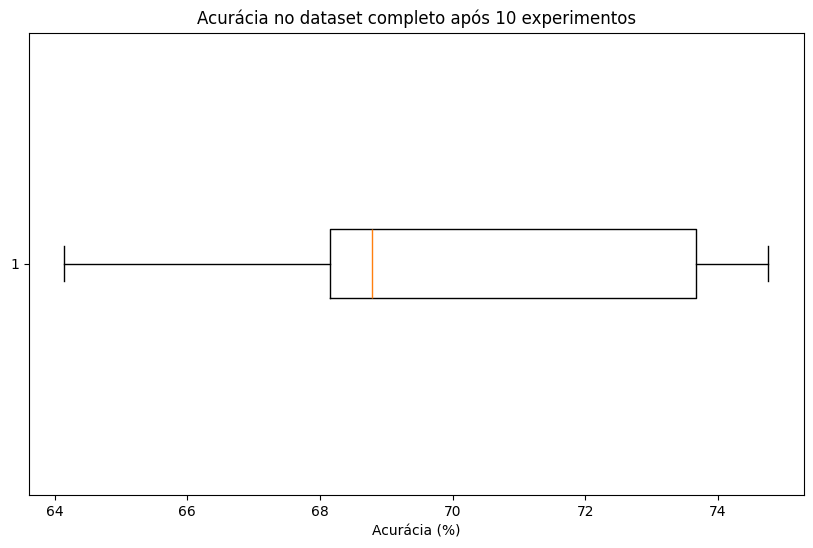

In [17]:
num_exp = 10
acc_list = []

for exp in range(num_exp):
    # temos menos amostras de uma classe do que outra. restringe para ficar meio a meio
    cutoff = len(ocorrencia_aeronave_encoded[ocorrencia_aeronave_encoded['classes'] == 1])

    # escolhe metade de uma classe e metade de outra
    class1 = ocorrencia_aeronave_encoded[ocorrencia_aeronave_encoded['classes'] == 1].sample(n=int(cutoff / 2))
    class0 = ocorrencia_aeronave_encoded[ocorrencia_aeronave_encoded['classes'] == 0].sample(n=int(cutoff / 2))

    balanced_df = pd.concat([class1, class0], axis=0, ignore_index=True)
    balanced_df = balanced_df.sample(frac=1) # embralha

    X = balanced_df.drop(columns='classes').values
    y = balanced_df['classes'].values

    kf = KFold(n_splits=5, shuffle=True) # 5 folds, shuffle data

    theta = []

    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train = add_bias(X_train)
        X_test = add_bias(X_test)

        theta = logistic_regression_gradient_descent(X_train, y_train, alpha=0.001, epochs=10000)

        # ve no conjunto de teste
        predictions = predict(X_test, theta)

        correct = 0
        for i in range(len(y_test)):
            if predictions[i] == y_test[i]: correct += 1
            # else:
            #     print(f"Incorreto: {y_test[i]} rotulado como {predictions[i]}")
                
        score = round(correct / len(y_test), 4) * 100
        scores.append(score)

    print(f"Individual fold scores: {scores}")
    print(f"Mean cross-validation score: {np.mean(scores)} +/- {np.std(scores)}")

    # testa o modelo nos dados originais não balanceados
    X = ocorrencia_aeronave_encoded.drop(columns='classes').values
    y = ocorrencia_aeronave_encoded['classes'].values

    X = add_bias(X)

    predictions = predict(X, theta)

    correct = 0
    for i in range(len(y)):
        if predictions[i] == y[i]: correct += 1
        # else:
        #     print(f"Incorreto: {y_test[i]} rotulado como {predictions[i]}")
            
    score = round(correct / len(y), 4) * 100
    acc_list.append(score)

# Create a horizontal boxplot
plt.figure(figsize=(10,6))
plt.boxplot(acc_list * 100, vert=False)

# Add labels and title
plt.xlabel("Acurácia (%)")
plt.title("Acurácia no dataset completo após 10 experimentos")

plt.show()
